### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
titanic=sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.drop(['sibsp','class','parch','who','embarked','adult_male','deck','embark_town','alive','alone'],axis='columns',inplace=True)
titanic

,survived,pclass,sex,age,fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [4]:
inputs= titanic.drop('survived',axis=1)
target=titanic.survived

### tackeling null values

In [5]:
import math
median = math.floor(inputs.age.median())
inputs.age=inputs.age.fillna(median)
median

28

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
inputs

,pclass,sex,age,fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500
...,...,...,...,...
886,2,male,27.0,13.0000
887,1,female,19.0,30.0000
888,3,female,28.0,23.4500
889,1,male,26.0,30.0000


In [7]:
inputs.sex = le.fit_transform(inputs.sex)
inputs
# male =1 female =0

,pclass,sex,age,fare
0,3,1,22.0,7.2500
1,1,0,38.0,71.2833
2,3,0,26.0,7.9250
3,1,0,35.0,53.1000
4,3,1,35.0,8.0500
...,...,...,...,...
886,2,1,27.0,13.0000
887,1,0,19.0,30.0000
888,3,0,28.0,23.4500
889,1,1,26.0,30.0000


### Train test split

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.4)
X_train

,pclass,sex,age,fare
657,3,0,32.0,15.5000
477,3,1,29.0,7.0458
230,1,0,35.0,83.4750
654,3,0,18.0,6.7500
530,2,0,2.0,26.0000
...,...,...,...,...
683,3,1,14.0,46.9000
168,1,1,28.0,25.9250
540,1,0,36.0,71.0000
812,2,1,35.0,10.5000


### creating log. reg. object

In [9]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [10]:
model.fit(X_train,y_train)

LogisticRegression()

In [11]:
y_predicted= model.predict(X_train)

In [12]:
model.score(X_test,y_test)

0.7675070028011205

### confusion matrix and other classification evaluation matrix

In [13]:
y_predicted= model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predicted)
cm

array([[175,  31],
       [ 52,  99]], dtype=int64)

Text(69.0, 0.5, 'Truth')

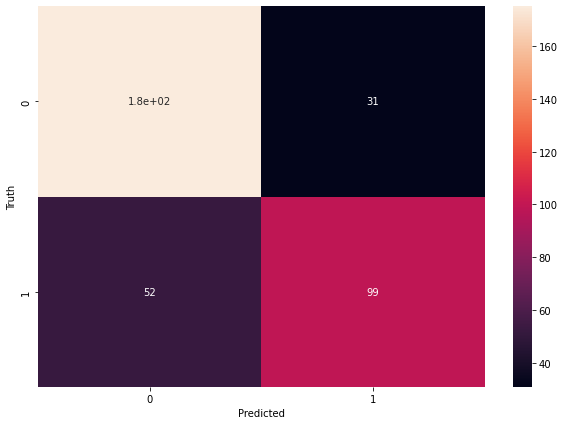

In [14]:
import seaborn as sn
plt.figure(figsize=(10,7)) # to increase the size
sn.heatmap(cm,annot=True) #annot for number in the boxes
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       206
           1       0.76      0.66      0.70       151

    accuracy                           0.77       357
   macro avg       0.77      0.75      0.76       357
weighted avg       0.77      0.77      0.76       357



### SVM

In [16]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)

SVC()

In [17]:
model.score(X_test, y_test)

0.6414565826330533

### Decision tree

In [18]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_test, y_test)

0.7871148459383753